#Introduction to Deep Learning

##Neural network from scratch

###Let's import the libraries

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
print("Version of numpy:", np.__version__)
print("Version of matplotlib:", matplotlib.__version__)

Version of numpy: 1.19.5
Version of matplotlib: 3.2.2


####%matplotlib inline
%matplotlib inline is an example of a predefined magic function in Ipython. They are frequently used in interactive environments like jupyter notebook.

%matplotlib inline makes your plot outputs appear and be stored within the notebook.

####import numpy as np
NumPy is the fundamental package for scientific computing in Python library.It is primarily used to work with arrays, and also has functions for working in domain of linear algebra, fourier transform, and matrices.

####import matplotlib.pyplot as plt
Matplotlib is a data visualisation and plotting library for python and numpy. pyplot is matplotlib's plotting framework

###Let's import the dataset, and store the input and output

In [ ]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, random_state=42, noise=0.1)

In [ ]:
X

array([[-0.05146968,  0.44419863],
       [ 1.03201691, -0.41974116],
       [ 0.86789186, -0.25482711],
       ...,
       [ 1.68425911, -0.34822268],
       [-0.9672013 ,  0.26367208],
       [ 0.78758971,  0.61660945]])

In [ ]:
y[0:5]

array([1, 1, 1, 1, 0])

####sklearn.datasets
The scikit-learn library provides a set of sample datasets, and the make_moons() function will generate a swirl pattern. 

###Let's visualise the data

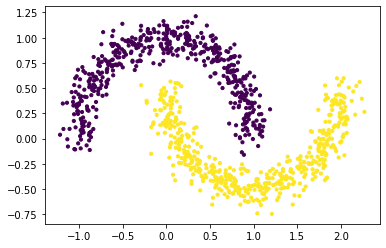

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

####plt.scatter()
this is used to draw a scatter plot with varying size and/or color

###Let's normalize the inputs


### Why normalize?
The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. 

In [ ]:
X -= X.min()
X /= X.max()

In [ ]:
X.min(), X.max()

(0.0, 1.0)

In [ ]:
np.unique(y)

array([0, 1])

####np.unique()
this is just to get the unique values from an array

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
X = X.T

y = y.reshape(1, -1)

####y.reshape(1, -1)
-1 simply means it is an unknown dimension, and we want the function to figure it out.

In [ ]:
X.shape, y.shape

((2, 1000), (1, 1000))

###Let's define the sigmoid function

In [ ]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

###Let's define the model architecture

In [ ]:
inputLayer_neurons = X.shape[0]
hiddenLayer_neurons = 10
outputLayer_neurons = 1

###Let's initialise the weights and define the parameters

In [ ]:
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

In [ ]:
lr = 0.1
epochs = 10000
losses=[]

###Forward propagation

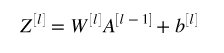

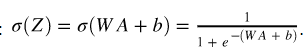

In [ ]:
hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)


outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output = sigmoid(outputLayer_linearTransform)

Calculating the error

In [ ]:
error = np.square(y - output) / 2

###Back propagation

Calculating the change of error with respect to weight between hidden and output layer

In [ ]:
error_wrt_output = -(y - output)
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

error_wrt_weights_hidden_output = np.dot(
outputLayer_LinearTransform_wrt_weights_hidden_output,
(error_wrt_output * output_wrt_outputLayer_LinearTransform).T)

In [ ]:
outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
hiddenLayer_activations, (1 - hiddenLayer_activations))
hiddenLayer_linearTransform_wrt_weights_input_hidden = X
error_wrt_weights_input_hidden = np.dot(
hiddenLayer_linearTransform_wrt_weights_input_hidden,
(
hiddenLayer_activations_wrt_hiddenLayer_linearTransform
* np.dot(
outputLayer_LinearTransform_wrt_hiddenLayer_activations,
(output_wrt_outputLayer_LinearTransform * error_wrt_output),
)
).T,
)

###Let's update the weights

In [ ]:
weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden


###Now lets run it for all the epochs

In [ ]:
for epoch in range(epochs):
  hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
  hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
  outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
  output = sigmoid(outputLayer_linearTransform)
  error = np.square(y - output) / 2
  error_wrt_output = -(y - output)
  output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
  outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

  error_wrt_weights_hidden_output = np.dot(
  outputLayer_LinearTransform_wrt_weights_hidden_output,
  (error_wrt_output * output_wrt_outputLayer_LinearTransform).T)
  outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
  hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
  hiddenLayer_activations, (1 - hiddenLayer_activations))
  hiddenLayer_linearTransform_wrt_weights_input_hidden = X
  error_wrt_weights_input_hidden = np.dot(
  hiddenLayer_linearTransform_wrt_weights_input_hidden,
  (
  hiddenLayer_activations_wrt_hiddenLayer_linearTransform
  * np.dot(
  outputLayer_LinearTransform_wrt_hiddenLayer_activations,
  (output_wrt_outputLayer_LinearTransform * error_wrt_output),
  )
  ).T,
  )
  weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
  weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden
  
  epoch_loss = np.average(error)
  if epoch % 100 == 0:
      print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

    
  losses.append(epoch_loss)



Error at epoch 0 is 0.19253
Error at epoch 100 is 0.24998
Error at epoch 200 is 0.24996
Error at epoch 300 is 0.06070
Error at epoch 400 is 0.04217
Error at epoch 500 is 0.03792
Error at epoch 600 is 0.03403
Error at epoch 700 is 0.03111
Error at epoch 800 is 0.02874
Error at epoch 900 is 0.02652
Error at epoch 1000 is 0.02438
Error at epoch 1100 is 0.02235
Error at epoch 1200 is 0.02049
Error at epoch 1300 is 0.01882
Error at epoch 1400 is 0.01733
Error at epoch 1500 is 0.01602
Error at epoch 1600 is 0.01488
Error at epoch 1700 is 0.01390
Error at epoch 1800 is 0.01306
Error at epoch 1900 is 0.01236
Error at epoch 2000 is 0.01178
Error at epoch 2100 is 0.01128
Error at epoch 2200 is 0.01086
Error at epoch 2300 is 0.01050
Error at epoch 2400 is 0.01019
Error at epoch 2500 is 0.00989
Error at epoch 2600 is 0.01003
Error at epoch 2700 is 0.00893
Error at epoch 2800 is 0.00885
Error at epoch 2900 is 0.00878
Error at epoch 3000 is 0.00875
Error at epoch 3100 is 0.00867
Error at epoch 3200 

Text(0, 0.5, 'Error')

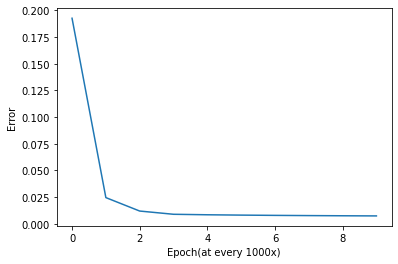

In [ ]:
k=[]
for i in range(0, 10):
  k.append(losses[1000*i])
plt.plot(k)
plt.xlabel("Epoch(at every 1000x)")
plt.ylabel("Error")

##AutoGrad

Auto grad is a powerful automatic differentiation library that makes it possible to differentiate python and numpy code. 

In [ ]:
import autograd.numpy as np
from autograd import grad

###defining the sigmoid function

In [ ]:
def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [ ]:
def logistic_predictions(weights, inputs):
      return sigmoid(np.dot(inputs, weights))

In [ ]:
def training_loss(weights):
    preds = logistic_predictions(weights, inputs)
    label_probabilities = preds * targets + (1 - preds) * (1 - targets)
    return -np.sum(np.log(label_probabilities))

In [ ]:
inputs = np.array([[0.52, 1.12,  0.77],
                   [0.88, -1.08, 0.15],
                   [0.52, 0.06, -1.30],
                   [0.74, -2.49, 1.39]])
targets = np.array([1, 1, 0, 1])

In [ ]:
training_gradient_fun = grad(training_loss)

In [ ]:
weights = np.array([0.0, 0.0, 0.0])
print("Initial loss:", training_loss(weights))
for i in range(100):
    weights -= training_gradient_fun(weights) * 0.01

print("Trained loss:", training_loss(weights))

Initial loss: 2.772588722239781
Trained loss: 1.0672706757870165


#Example of a neural network

In [ ]:
import torch 
import torch.nn as nn

###import torch
Pytorch is a python-based scientific computing package. 
[Tutorial on pytorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
###import torch.nn
Pytorch provides teh torch.nn module to help us in creating and training the neural network

Defining the input size, hidden layer size, output size and batch size 

In [ ]:
n_in, n_h, n_out = 10, 5, 1

In [ ]:
x = torch.randn(10, n_in)
y = torch.tensor([[1.0], [0.0], [0.0], 
[1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])

###Let's build the model
the model will have an input layer followed by a linear layer, followed by a reLU layer followed by a linear layer and finally a sigmoid layer
###nn.Linear
CLASS torch.nn.Linear(in_features, out_features, bias=True)

Applies a linear transformation to the incoming data: y = x*W^T + b

Parameters:

in_features – size of each input sample (i.e. size of x)
out_features – size of each output sample (i.e. size of y)
bias – If set to False, the layer will not learn an additive bias. Default: True
This will create a weight matrix and bias vector randomly

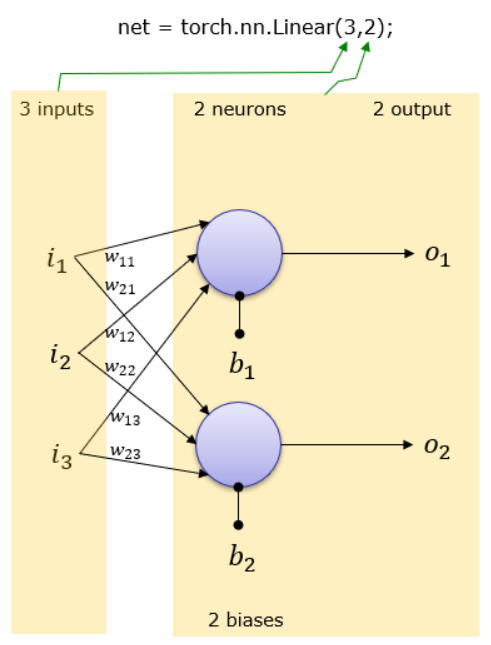

###nn.reLU()
as per relu function’s definition, It keeps the positive numbers as the number itself and it for negative number, it returns 0.


###nn.Sigmoid()
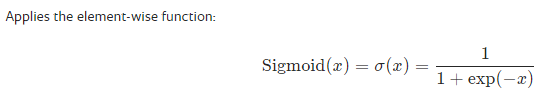

In [ ]:
model = nn.Sequential(nn.Linear(n_in, n_h),
                     nn.ReLU(),
                     nn.Linear(n_h, n_out),
                     nn.Sigmoid())

###torch.nn.MSELoss()
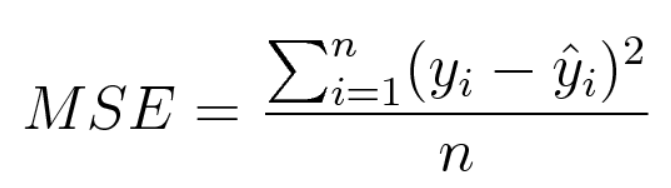

In [ ]:
criterion = torch.nn.MSELoss()

torch.optim is a PyTorch package containing various optimization algorithms.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [ ]:
losses_nn=[]

In [ ]:
for epoch in range(1000):
   y_pred = model(x)
   loss = criterion(y_pred, y)
   if epoch%100 == 0:
     losses_nn.append(loss.item())
     print('epoch: ', epoch,' loss: ', loss.item())
     
   optimizer.zero_grad()
   loss.backward()
   optimizer.step()



epoch:  0  loss:  0.2416032999753952
epoch:  100  loss:  0.23129284381866455
epoch:  200  loss:  0.2222171276807785
epoch:  300  loss:  0.21272090077400208
epoch:  400  loss:  0.2024131566286087
epoch:  500  loss:  0.19134442508220673
epoch:  600  loss:  0.18075114488601685
epoch:  700  loss:  0.17063923180103302
epoch:  800  loss:  0.16015087068080902
epoch:  900  loss:  0.15010419487953186


In [ ]:
losses_nn

[0.2416032999753952,
 0.23129284381866455,
 0.2222171276807785,
 0.21272090077400208,
 0.2024131566286087,
 0.19134442508220673,
 0.18075114488601685,
 0.17063923180103302,
 0.16015087068080902,
 0.15010419487953186]

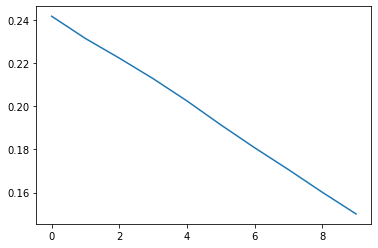

In [ ]:
plt.plot(losses_nn)